## Multi Linear Regression

In [1]:
# import required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# prequisities

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# load the dataset
df=pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## EDA

In [4]:
# gives statistical info about the dataset
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Split the data

In [9]:
# create x
x = df.drop(['newspaper','sales'],axis=1)

#create y
y=df['sales']

In [10]:
# split the data into train and test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=123456)

In [11]:
x_train

,TV,radio
135,48.3,47.0
190,39.5,41.1
152,197.6,23.3
90,134.3,4.9
111,241.7,38.0
...,...,...
43,206.9,8.4
171,164.5,20.9
56,7.3,28.1
49,66.9,11.7


### Train the model

In [12]:
from sklearn.linear_model import LinearRegression

# create the model
model = LinearRegression()

# fit the model 
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
print(x_train.columns)

Index(['TV', 'radio'], dtype='object')


In [14]:
y_pred = model.predict(x_test)

In [15]:
x_test

,TV,radio
107,90.4,0.3
188,286.0,13.9
88,88.3,25.5
109,255.4,26.9
186,139.5,2.1
127,80.2,0.0
168,215.4,23.6
81,239.8,4.1
105,137.9,46.4
7,120.2,19.6


In [16]:
y_pred

array([ 7.08719501, 18.62756946, 11.78790841, 19.70171334,  9.67688162,
        6.56328802, 17.24296234, 14.64780116, 18.03616225, 12.12474382,
        9.94775488, 14.23272316,  6.05198147,  7.38924787, 12.53168014,
       17.05994048,  8.88251946, 13.22735794, 10.45230687, 13.83258819,
       14.76618764, 19.71123762, 17.03970097, 20.39746209, 17.35102003,
       13.86522587, 15.01000196,  3.56860317,  8.14250614, 12.16685901,
       10.65452373, 20.32314695,  8.83153808,  9.12977219, 19.43773499,
        7.88391785, 12.76358532, 10.86929424, 18.49599385, 17.01665852,
       13.88956188, 18.49607385,  9.16954478, 14.72831538, 10.40099192,
        5.28863892, 19.54429234, 12.96261281,  6.13091536,  4.45603772,
       21.17113796, 12.30311372, 17.34178253, 17.10166019, 12.4226202 ,
       20.91509904, 12.62685513, 10.55463642, 16.40514014, 17.68777996])

#### check the model performance (evaluation metrics)


In [17]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test,y_pred)
mae

1.1143638040589197

In [18]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,y_pred)
mse

2.1304855254062947

In [19]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_test,y_pred)
rmse

1.4596182807180427

In [20]:
# please check the R2 score

### Visualize the Data

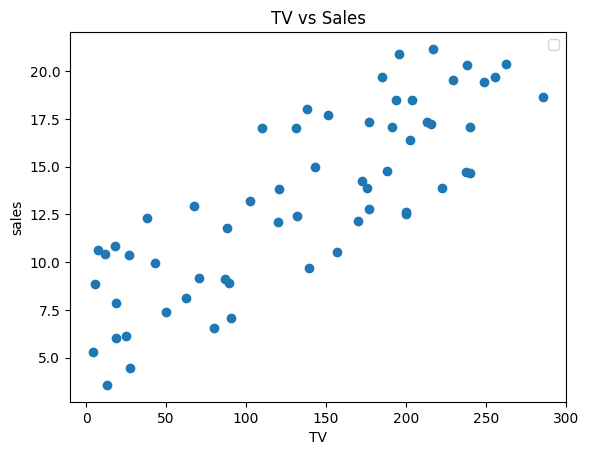

In [21]:
plt.scatter(x_test['TV'],y_pred)
plt.xlabel("TV")
plt.ylabel("sales")
plt.title("TV vs Sales")
plt.legend()

In [ ]:
# plot the data for radio vs sales